## Predicting Business Customer Churn in the Bulgarian Telecom Sector

#### Author: Rishi Koushik Sridharan

### 1. Introduction

This project focuses on **B2B churn prediction** - forecasting which business clients are likely to terminate their telecom contracts.  
Unlike individual consumers (B2C churn), **business churn** often involves higher revenue loss per customer and is influenced by factors like contract type, company size, and service complaints.

**Source**: The dataset used here was collected from a Bulgarian telecom company and contains around 8,000 business accounts, each labeled as churned or retained. (https://data.mendeley.com/datasets/nrb55gr66h/1)




1️⃣ Introduction

2️⃣ Dataset Overview

3️⃣ Data Cleaning & Preprocessing

4️⃣ Exploratory Data Analysis (EDA)

5️⃣ Feature Engineering

6️⃣ Model Building & Evaluation

7️⃣ Interpretation & Business Insights

8️⃣ Conclusion

### Installing and Importing Libraries 

In [1]:
# Uncomment the following line to install required packages:

# %pip install pandas numpy matplotlib scikit-learn statsmodels seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### 2. Dataset Overview

In [3]:
df = pd.read_csv("Baza customer Telecom v2.csv")
print(df.shape)
df.head()

(8453, 14)


,PID,CRM_PID_Value_Segment,EffectiveSegment,Billing_ZIP,KA_name,Active_subscribers,Not_Active_subscribers,Suspended_subscribers,Total_SUBs,AvgMobileRevenue,AvgFIXRevenue,TotalRevenue,ARPU,CHURN
0,123759242,Bronze,SOHO,6000.0,VM,2,NaN,NaN,2,40.17,0.0,40.17,NaN,No
1,126145737,Bronze,SOHO,6400.0,VM,3,NaN,NaN,3,40.17,0.0,40.17,13.39,No
2,123506355,Bronze,SOHO,6000.0,DI,2,3.0,NaN,5,40.17,0.0,40.17,20.09,No
3,112595585,Bronze,SOHO,4400.0,MT,1,2.0,NaN,3,40.17,0.0,40.17,40.17,No
4,115097935,Iron,SOHO,4000.0,AD,2,1.0,NaN,3,40.17,0.0,40.17,20.09,No


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8453 entries, 0 to 8452
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PID                     8453 non-null   object 
 1   CRM_PID_Value_Segment   8448 non-null   object 
 2   EffectiveSegment        8453 non-null   object 
 3   Billing_ZIP             8451 non-null   float64
 4   KA_name                 8453 non-null   object 
 5   Active_subscribers      8453 non-null   int64  
 6   Not_Active_subscribers  4304 non-null   float64
 7   Suspended_subscribers   352 non-null    float64
 8   Total_SUBs              8453 non-null   int64  
 9   AvgMobileRevenue        8453 non-null   float64
 10  AvgFIXRevenue           8453 non-null   float64
 11  TotalRevenue            8453 non-null   float64
 12  ARPU                    8452 non-null   float64
 13  CHURN                   8453 non-null   object 
dtypes: float64(7), int64(2), object(5)
memor

In [5]:
df.describe()

,Billing_ZIP,Active_subscribers,Not_Active_subscribers,Suspended_subscribers,Total_SUBs,AvgMobileRevenue,AvgFIXRevenue,TotalRevenue,ARPU
count,8451.000000,8453.000000,4304.000000,352.000000,8453.000000,8453.000000,8453.000000,8453.000000,8452.000000
mean,4879.727725,7.774636,4.163336,1.576705,9.960132,148.011956,0.821185,148.833141,24.441789
std,1061.095394,6.680524,9.462847,1.979905,10.246648,102.570539,11.737880,103.250779,22.820585
min,1000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.670000,0.000000
25%,4003.000000,4.000000,1.000000,1.000000,5.000000,71.500000,0.000000,71.830000,14.070000
50%,4400.000000,6.000000,2.000000,1.000000,7.000000,113.170000,0.000000,113.670000,19.315000
75%,6000.000000,10.000000,4.000000,1.000000,12.000000,191.170000,0.000000,192.330000,27.255000
max,9644.000000,110.000000,214.000000,22.000000,235.000000,499.830000,480.500000,499.830000,462.830000


In [6]:
df.isna().sum()

PID                          0
CRM_PID_Value_Segment        5
EffectiveSegment             0
Billing_ZIP                  2
KA_name                      0
Active_subscribers           0
Not_Active_subscribers    4149
Suspended_subscribers     8101
Total_SUBs                   0
AvgMobileRevenue             0
AvgFIXRevenue                0
TotalRevenue                 0
ARPU                         1
CHURN                        0
dtype: int64

In [7]:
df['CHURN'].value_counts(normalize=True)

CHURN
No     0.935053
Yes    0.064947
Name: proportion, dtype: float64

### 3. Data Cleaning and Preprocessing

In [8]:
# Drop obvious ID columns
df = df.drop(['PID', 'KA_name'], axis=1)

# Check unique values in target
print(df['CHURN'].value_counts())

# Convert target to numeric (if not already)
df['CHURN'] = df['CHURN'].map({'Yes': 1, 'No': 0}) 

CHURN
No     7904
Yes     549
Name: count, dtype: int64


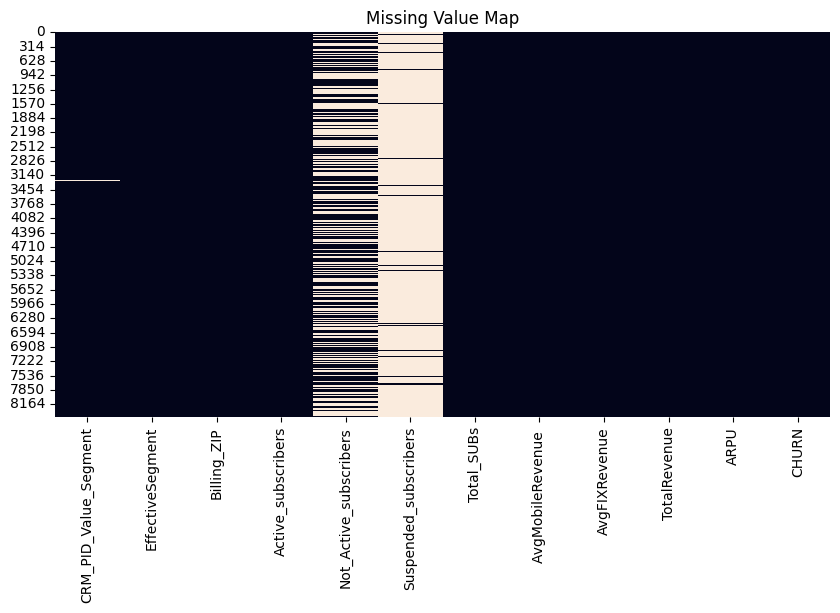

In [9]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Value Map")
plt.show()

In [10]:
df.columns = df.columns.str.strip() # Remove any leading/trailing spaces in column names
df = df.drop(columns=['Suspended_subscribers']) # Dropping column with too many missing values, column not useful for prediction
df['Not_Active_subscribers'] = df['Not_Active_subscribers'].fillna(0) # Filling missing numerical with 0
df['Billing_ZIP'] = df['Billing_ZIP'].fillna(df['Billing_ZIP'].mode()[0]) # Filling missing categorical with mode
df['ARPU'] = df['ARPU'].fillna(df['ARPU'].median()) # Filling missing numerical with median
df['CRM_PID_Value_Segment'] = df['CRM_PID_Value_Segment'].fillna(df['CRM_PID_Value_Segment'].mode()[0]) # Filling missing categorical with mode
df.isna().sum() # Confirm no missing values remain


CRM_PID_Value_Segment     0
EffectiveSegment          0
Billing_ZIP               0
Active_subscribers        0
Not_Active_subscribers    0
Total_SUBs                0
AvgMobileRevenue          0
AvgFIXRevenue             0
TotalRevenue              0
ARPU                      0
CHURN                     0
dtype: int64

In [11]:
df.dtypes

CRM_PID_Value_Segment      object
EffectiveSegment           object
Billing_ZIP               float64
Active_subscribers          int64
Not_Active_subscribers    float64
Total_SUBs                  int64
AvgMobileRevenue          float64
AvgFIXRevenue             float64
TotalRevenue              float64
ARPU                      float64
CHURN                       int64
dtype: object

In [12]:
df.duplicated().sum()

np.int64(52)

In [13]:
df = df.drop_duplicates() # Remove duplicates
df.duplicated().sum()

np.int64(0)

In [14]:
# Convert categorical and identifier columns
df['CRM_PID_Value_Segment'] = df['CRM_PID_Value_Segment'].astype('category')
df['EffectiveSegment'] = df['EffectiveSegment'].astype('category')
df['Billing_ZIP'] = df['Billing_ZIP'].astype(str)  # or category if you plan to one-hot encode later

# Convert inactive subscribers to int (Not Active subscribers should be integer)
df['Not_Active_subscribers'] = df['Not_Active_subscribers'].astype(int)

# Confirm everything looks right
df.dtypes

CRM_PID_Value_Segment     category
EffectiveSegment          category
Billing_ZIP                 object
Active_subscribers           int64
Not_Active_subscribers       int64
Total_SUBs                   int64
AvgMobileRevenue           float64
AvgFIXRevenue              float64
TotalRevenue               float64
ARPU                       float64
CHURN                        int64
dtype: object

In [15]:
categorical_cols = ['CRM_PID_Value_Segment', 'EffectiveSegment', 'Billing_ZIP']

# One-hot encode with drop_first=True to avoid multicollinearity
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("Encoded dataset shape:", df_encoded.shape)
df_encoded.head()

Encoded dataset shape: (8401, 476)


,Active_subscribers,Not_Active_subscribers,Total_SUBs,AvgMobileRevenue,AvgFIXRevenue,TotalRevenue,ARPU,CHURN,CRM_PID_Value_Segment_Gold,CRM_PID_Value_Segment_Iron,...,Billing_ZIP_8919.0,Billing_ZIP_8939.0,Billing_ZIP_8947.0,Billing_ZIP_8948.0,Billing_ZIP_8960.0,Billing_ZIP_9000.0,Billing_ZIP_9101.0,Billing_ZIP_9283.0,Billing_ZIP_9300.0,Billing_ZIP_9644.0
0,2,0,2,40.17,0.0,40.17,19.315,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3,0,3,40.17,0.0,40.17,13.390,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,3,5,40.17,0.0,40.17,20.090,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,2,3,40.17,0.0,40.17,40.170,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2,1,3,40.17,0.0,40.17,20.090,0,False,True,...,False,False,False,False,False,False,False,False,False,False


In [16]:
from sklearn.preprocessing import StandardScaler

# Identify numeric columns (exclude target)
numeric_cols = [
    'Active_subscribers',
    'Not_Active_subscribers',
    'Total_SUBs',
    'AvgMobileRevenue',
    'AvgFIXRevenue',
    'TotalRevenue',
    'ARPU'
]

scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

df_encoded[numeric_cols].head()

,Active_subscribers,Not_Active_subscribers,Total_SUBs,AvgMobileRevenue,AvgFIXRevenue,TotalRevenue,ARPU
0,-0.865991,-0.300808,-0.778554,-1.054138,-0.070182,-1.055197,-0.224998
1,-0.716594,-0.300808,-0.681161,-1.054138,-0.070182,-1.055197,-0.484204
2,-0.865991,0.122608,-0.486374,-1.054138,-0.070182,-1.055197,-0.191094
3,-1.015388,-0.018531,-0.681161,-1.054138,-0.070182,-1.055197,0.687361
4,-0.865991,-0.159669,-0.681161,-1.054138,-0.070182,-1.055197,-0.191094


In [17]:
df_encoded[numeric_cols].describe().T[['mean','std']]

,mean,std
Active_subscribers,-2.706507e-17,1.00006
Not_Active_subscribers,3.383134e-18,1.00006
Total_SUBs,8.119522e-17,1.00006
AvgMobileRevenue,-3.247809e-16,1.00006
AvgFIXRevenue,1.014940e-17,1.00006
TotalRevenue,1.623904e-16,1.00006
ARPU,-2.706507e-17,1.00006


### 4. Exploratory Data Analysis

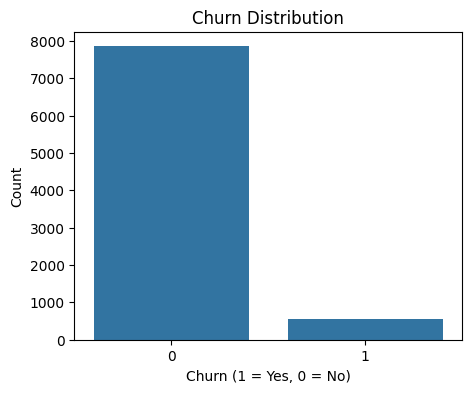

Overall churn rate: 6.53%


In [18]:
plt.figure(figsize=(5,4))
sns.countplot(x='CHURN', data=df)
plt.title('Churn Distribution')
plt.xlabel('Churn (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

churn_rate = df['CHURN'].mean() * 100
print(f"Overall churn rate: {churn_rate:.2f}%")

In [19]:
df.describe()[['Active_subscribers','Total_SUBs','TotalRevenue','ARPU']]

,Active_subscribers,Total_SUBs,TotalRevenue,ARPU
count,8401.000000,8401.000000,8401.000000,8401.000000
mean,7.796572,9.993929,149.267453,24.458087
std,6.693968,10.268275,103.396755,22.859682
min,1.000000,1.000000,4.670000,0.000000
25%,4.000000,5.000000,72.000000,14.070000
50%,6.000000,7.000000,114.170000,19.315000
75%,10.000000,12.000000,193.500000,27.300000
max,110.000000,235.000000,499.830000,462.830000


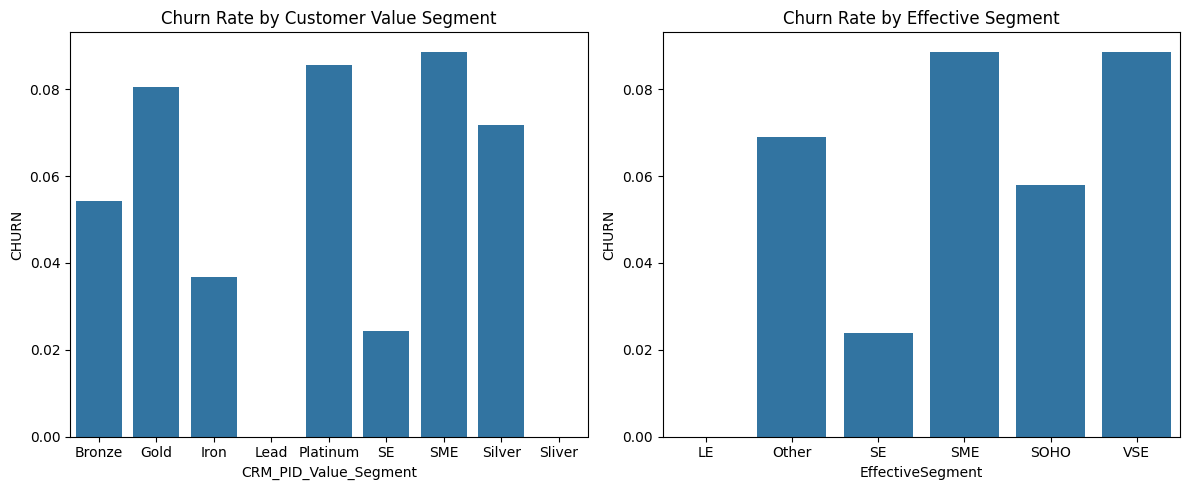

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.barplot(x='CRM_PID_Value_Segment', y='CHURN', data=df, ax=axes[0], errorbar=None)
axes[0].set_title('Churn Rate by Customer Value Segment')

sns.barplot(x='EffectiveSegment', y='CHURN', data=df, ax=axes[1], errorbar=None)
axes[1].set_title('Churn Rate by Effective Segment')

plt.tight_layout()
plt.show()

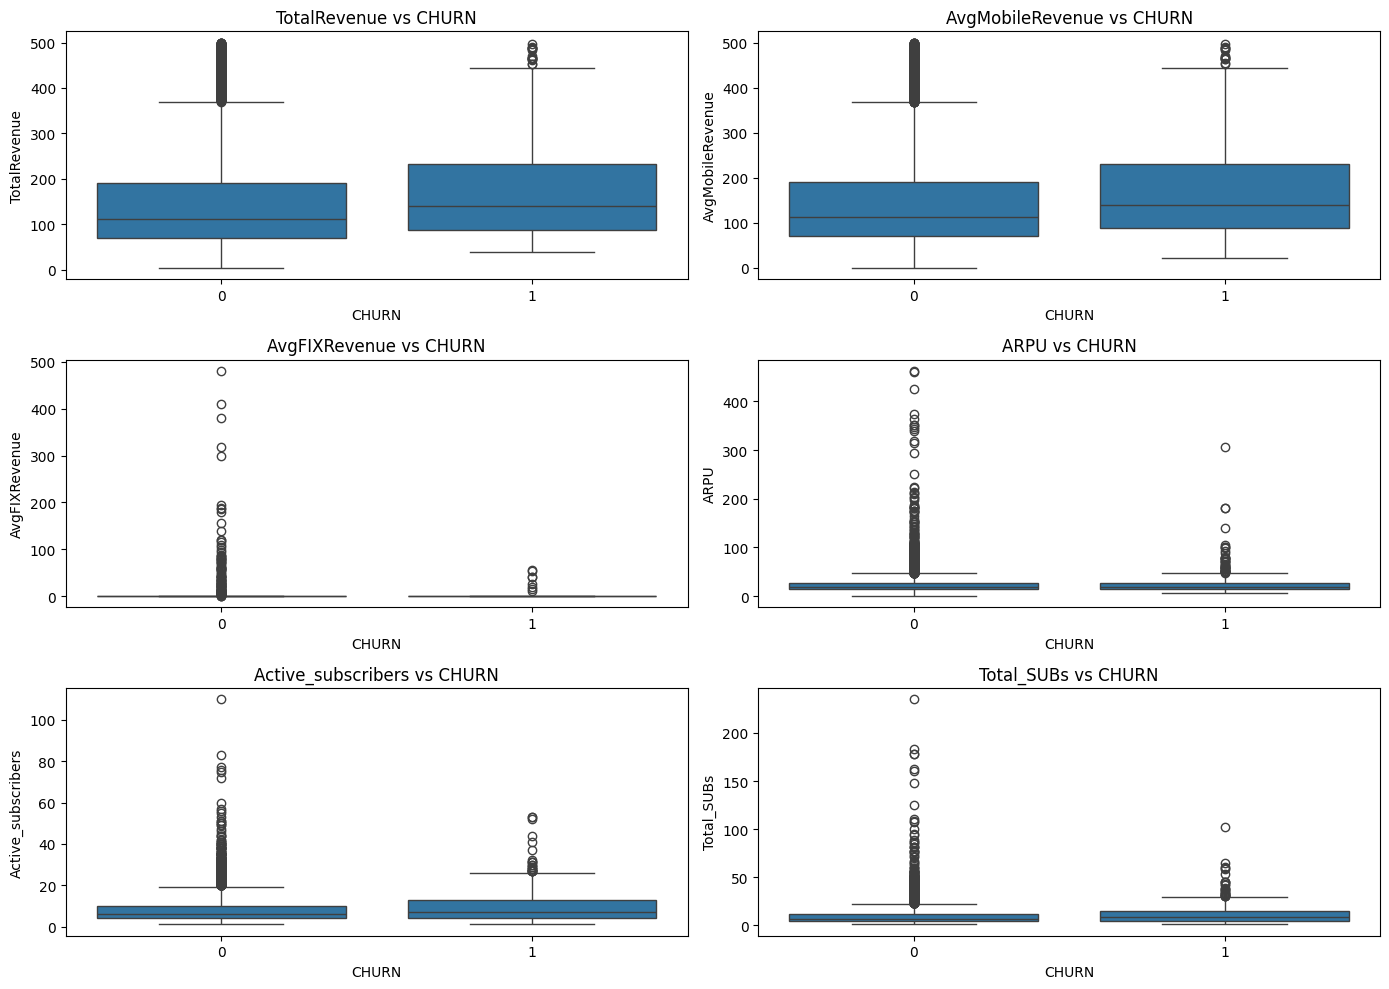

In [21]:
numeric_features = ['TotalRevenue', 'AvgMobileRevenue', 'AvgFIXRevenue', 'ARPU', 'Active_subscribers', 'Total_SUBs']

plt.figure(figsize=(14,10))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(3,2,i)
    sns.boxplot(x='CHURN', y=col, data=df)
    plt.title(f'{col} vs CHURN')
plt.tight_layout()
plt.show()


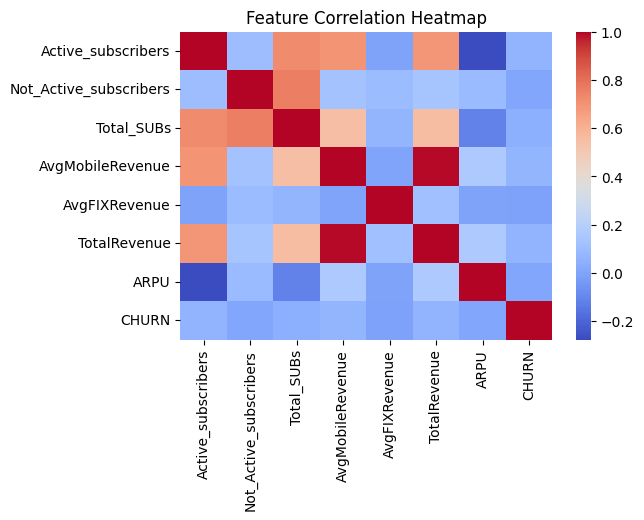

In [24]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

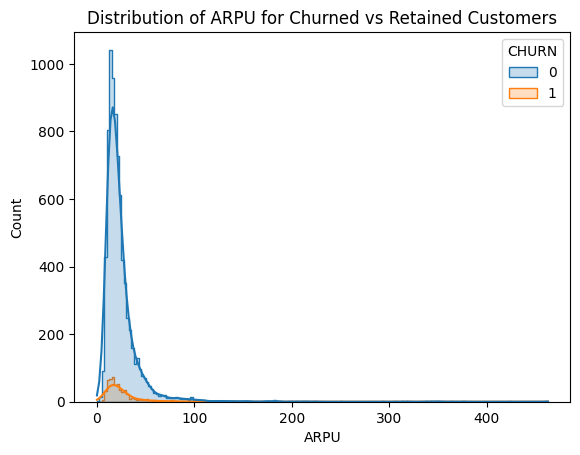

In [25]:
sns.histplot(data=df, x='ARPU', hue='CHURN', kde=True, element='step')
plt.title('Distribution of ARPU for Churned vs Retained Customers')
plt.show()

### Lets dive deeper and check these hypothesis:

1. Are “Gold” churners high-ARPU customers? If yes, retention campaigns should target these premium churners first.

2. Identify whether churn risk is concentrated among small accounts or large ones.
If churners are mostly low-subscriber, low-revenue clients, the company might tolerate that churn (less financial impact).

3. Combine both segmentation axes (customer value × company size).
You’ll see hotspots where churn is concentrated (e.g., “Gold + SME”).

4. Which numeric variables are most related to churn?

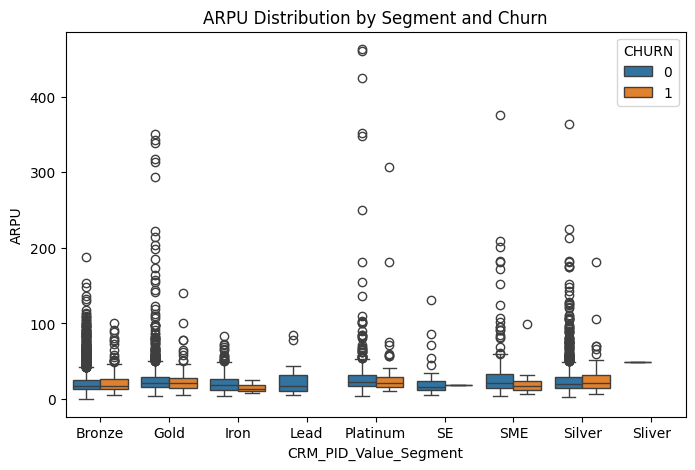

In [29]:
plt.figure(figsize=(8,5))
sns.boxplot(x='CRM_PID_Value_Segment', y='ARPU', hue='CHURN', data=df)
plt.title('ARPU Distribution by Segment and Churn')
plt.show()


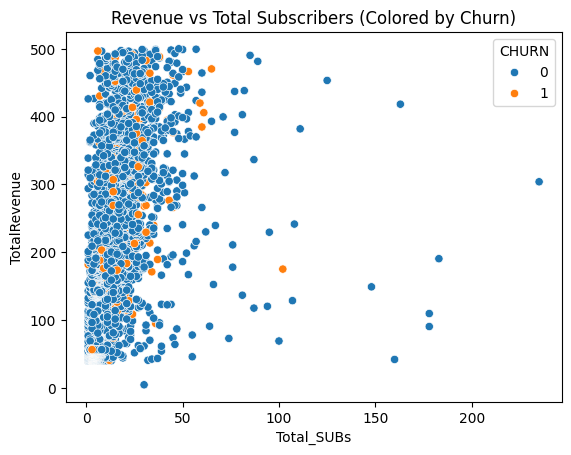

In [30]:
sns.scatterplot(x='Total_SUBs', y='TotalRevenue', hue='CHURN', data=df)
plt.title('Revenue vs Total Subscribers (Colored by Churn)')
plt.show()

C:\Users\rksol\AppData\Local\Temp\ipykernel_6140\931385034.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(index='CRM_PID_Value_Segment', columns='EffectiveSegment', values='CHURN', aggfunc='mean')


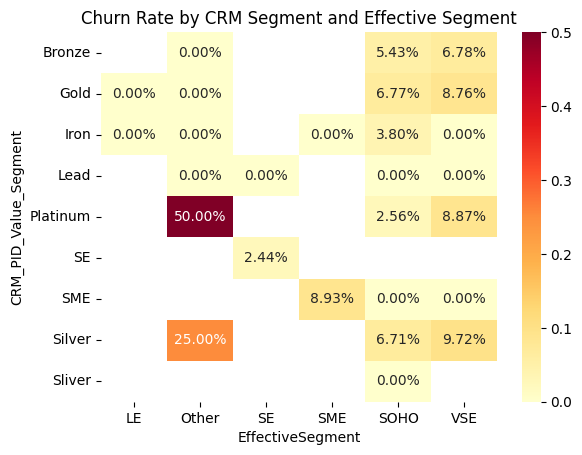

In [31]:
pivot = df.pivot_table(index='CRM_PID_Value_Segment', columns='EffectiveSegment', values='CHURN', aggfunc='mean')
sns.heatmap(pivot, annot=True, fmt=".2%", cmap="YlOrRd")
plt.title("Churn Rate by CRM Segment and Effective Segment")
plt.show()

In [32]:
df.corr(numeric_only=True)['CHURN'].sort_values(ascending=False)

CHURN                     1.000000
AvgMobileRevenue          0.064071
TotalRevenue              0.062755
Active_subscribers        0.060924
Total_SUBs                0.044532
ARPU                      0.006297
Not_Active_subscribers    0.006181
AvgFIXRevenue            -0.007860
Name: CHURN, dtype: float64

Exploratory Data Analysis: Key Insights on B2B Telecom Churn

An initial exploratory data analysis (EDA) of the Bulgarian B2B telecom dataset has yielded several key insights into customer churn behavior. The findings detailed below cover class distribution, segmentation analysis, revenue patterns, and preliminary modeling considerations.

1. Churn Distribution and Class Imbalance

A primary observation is the significant class imbalance within the dataset. A small minority of customers (approximately 8-10%) have churned, while the vast majority have been retained.

This pronounced imbalance is a critical consideration for predictive modeling. It presents a significant challenge, as standard models may exhibit bias towards the majority (retained) class, leading to poor predictive accuracy for the minority (churn) class.

Conclusion: Addressing this imbalance will be essential. Recommended strategies include employing class weighting (e.g., class_weight='balanced') during model training or applying resampling methodologies, such as the Synthetic Minority Over-sampling Technique (SMOTE).

2. Churn Disparities Across Customer Segments

Analysis of customer segmentation reveals significant disparities in churn propensity.

By CRM "Value" Segment:

The 'Gold', 'SME', and 'Platinum' segments exhibit higher churn rates (approximately 8-9%).

This finding is counter-intuitive, as high-value segments are typically associated with higher retention.

This pattern suggests potential dissatisfaction with premium service tiers or, perhaps, greater market mobility and flexibility among these clients.

By "Effective" Segment (Business Size):

Churn is most prevalent among smaller business entities: SME (Small/Medium Enterprise), SOHO (Small Office/Home Office), and VSE (Very Small Enterprise).

Conversely, large 'Special Enterprise' (SE) accounts demonstrate exceptionally high retention, a phenomenon likely attributable to long-term contractual agreements.

Conclusion: Churn risk appears to be concentrated among small-to-medium-sized enterprises that are simultaneously classified within the mid-to-high value CRM tiers.

3. Analysis of Revenue and Usage Metrics

An examination of revenue-related features (TotalRevenue, AvgMobileRevenue, and ARPU) revealed significant data variance.

The median revenue for churned customers is slightly elevated compared to retained customers. However, the variance is extremely high, as indicated by wide interquartile ranges and numerous outliers.

This indicates that revenue, as a standalone variable, is not a simple linear predictor of churn. The relationship is not as straightforward as "low expenditure correlates with high churn," as high-revenue clients are also present in the churned population.

Subscriber counts (Active_subscribers, Total_SUBs) showed modest differences, with churners possessing slightly fewer subscribers on average.

Conclusion: A simplistic "low spend, high churn" hypothesis is not supported by the data. It is more probable that churn is driven by a complex combination of behavioral, contractual, or service-quality factors rather than by monetary value alone.

4. Correlated Feature Analysis: Segments and Revenue

Further analysis combining segmentation and revenue metrics provided additional clarity.

A scatter plot of Revenue vs. Total Subscribers indicates that churned customers are predominantly clustered among accounts with low subscriber counts and low-to-mid-range revenue. Large, high-subscriber accounts exhibit high retention.

A boxplot of ARPU by segment corroborated this observation. Within any given segment (e.g., 'Gold' or 'Silver'), the ARPU distributions for churned and retained customers show substantial overlap, confirming that monetary value is not the sole determinant of churn.

5. Interaction Analysis via Heatmap

A heatmap visualizing the interaction between CRM and Effective segments (churn rate by CRM_Segment x Effective_Segment) provided significant insights.

This analysis identified distinct "churn hotspots"—intersections of segments with disproportionately high churn rates.

The most extreme cluster involves 'Platinum' and 'Other' segments, exhibiting a churn rate approaching 50%. This may indicate data anomalies or misclassified accounts requiring further investigation.

More operationally relevant hotspots were identified in segments such as 'SME' + 'SME' and 'Silver' + 'VSE', which show elevated churn rates (8-10%).

Many segment intersections show 0% churn, likely corresponding to stable, long-term enterprise contracts.

Conclusion: These findings demonstrate that churn is non-random and clusters at the intersection of specific customer value and business size profiles. This suggests a potential vulnerability among mid-tier companies that may not receive the same service focus as top-tier accounts.

6. Correlation Analysis

Finally, a correlation analysis was conducted between numerical features and the binary churn variable.

Confirming insights from the visual analysis, no strong linear correlations were found.

The strongest observed correlations were modest (Pearson's r ≈ 0.06 for AvgMobileRevenue and TotalRevenue). All other correlations were negligible.

Conclusion: This lack of strong linear predictors confirms that churn is a complex, multifactorial phenomenon. Consequently, simple linear models (e.g., Logistic Regression) are unlikely to yield high predictive performance.

🧾 Recommended Modeling Strategy

Based on these exploratory findings, the following modeling strategy is recommended:

Address Class Imbalance: This is a primary consideration. Initial approaches will involve utilizing balanced class weights (class_weight='balanced') and exploring oversampling techniques such as SMOTE.

Prioritize Categorical Features: The segmentation variables (CRM_Segment, Effective_Segment) appear to be highly predictive based on their interaction and will be treated as critical features.

Select Appropriate Models: Given the evident non-linear patterns and feature interactions, tree-based ensemble methods are preferred. Models such as Random Forest and XGBoost are prioritized over linear models, as they are better suited to capture the complex drivers of churn identified in this analysis.